### Different example uses for ColorCube

In [1]:
import os, sys, copy
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState

In [59]:
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.ImgUtils import (filter_pixels_circle
                              ,crop_img
                             )

In [340]:
from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot
                                    )
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

from modules.AnalysisHelpers import (threshToEdges
                                     ,pointsToList
                                    )

from modules.AnalysisHelpers import PixelConfusionMatrix

##### Load Book Data

In [5]:
DATA_DIR = "../data/misc/books/cc-gallery-2/"

In [6]:
gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))
all_data = gsDb.selectAll()
listGS = [ pickle.loads(d[1]) for d in all_data]
                
[_gs.frameCounter for _gs in listGS]

[0, 0, 0, 0, 189, 256]

In [35]:
for _gs in listGS:
    _gs.initDisplay()
    cvtPlot(_gs.getZoomWindow())
    plt.show()

##### Build thresh region volume

In [31]:
tracker = TrackFactory()
tracker.setInit(ballColor="green")

threshLo = tracker.getTrackParams()['thresh_lo']
threshHi = tracker.getTrackParams()['thresh_hi']

print threshLo, threshHi

(29, 86, 6) (64, 255, 255)


In [ ]:
plotEdges = pointsToList(threshToEdges(threshLo, threshHi, stepAmt = 10))

In [32]:
img = listGS[0].getZoomWindow()
colorData = imgToColors(img, sampleN = 1000)
listB, listG, listR = colorData

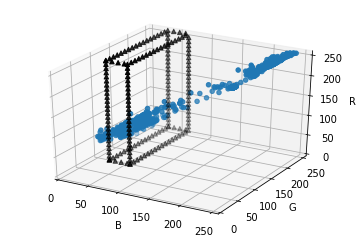

In [34]:
#subprocColorCube(listB, listG, listR, regionMarkers = plotEdges)
colorCube(listB, listG, listR, regionMarkers = plotEdges)

### Confusion Matrix Colorcoded

In [327]:
from modules.AnalysisHelpers import PixelConfusionMatrix

In [328]:
pcm = PixelConfusionMatrix()

In [329]:
pcm.setImg(listGS[0].getOrigFrame())

In [330]:
thresh = (
             tracker.getTrackParams()['thresh_lo']
            ,tracker.getTrackParams()['thresh_hi']
        )
pcm.setThresh(thresh)

In [331]:
pcm.setCircle(listGS[3].displayOutputScore['0']['data'])

In [332]:
pcm.calc()

In [333]:
pcm.getVals()

{'f': 305683,
 'fn': 855,
 'fp': 27,
 'n': 306511,
 'p': 689,
 't': 1517,
 'tn': 305656,
 'tp': 662}

In [336]:
cm = pcm.getData()

In [338]:
plotData = {'tp':cm['tp'], 'fp': cm['fp'], 'fn':cm['fn']}

In [339]:
metrics = ['tp', 'fp', 'fn']

plotData = {}
for metric in metrics:
    plotData[metric] = pointsToList(cm[metric])

In [349]:
plotTn = pointsToList(
                random.sample(cm['tn'], 1000) 
        )

In [352]:
p = SubprocColorCube( *plotTn
#          ,listColors = channelsToColorStr(*pixelsOut)
          ,regionMarkers = plotEdges 
          ,spaceTotal=False
          ,dictData = plotData)

p.save()

# p.plot()

loaded class type:  SubprocColorCube


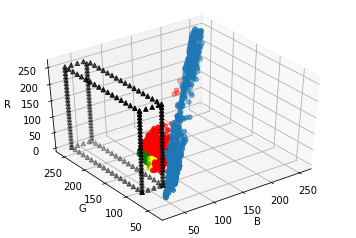

In [351]:
p = SubprocColorCube()
p.load()
p.callPlot()

loaded class type:  SubprocColorCube


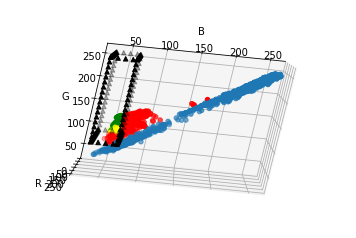

In [353]:
p = SubprocColorCube()
p.load()
p.callPlot()

In [296]:
[ x.displayOutputScore for x in listGS]

[None,
 None,
 None,
 {'0': {'data': (203, 161, 47, 44), 'type': 'circle'}},
 {'0': {'data': (289, 421, 9, 10), 'type': 'circle'}},
 {'0': {'data': (320, 223, 10, 9), 'type': 'circle'}}]